In [1]:
import numpy as np
import pandas as pd

In [3]:
np.random.seed(42)
col_A=np.random.normal(loc=50,scale=5,size=100)
col_B=np.random.normal(loc=30,scale=3,size=100)
outliers_A=np.array([120,200,170])
outliers_B=np.array([5,2,1])
col_A_with_outliers=np.concatenate([col_A,outliers_A])
col_B_with_outliers=np.concatenate([col_B,outliers_B])

In [4]:
df = pd.DataFrame({
    'A': col_A_with_outliers,
    'B': col_B_with_outliers
})

In [9]:
df.head()

,A,B
0,52.483571,25.753888
1,49.308678,28.738064
2,53.238443,28.971856
3,57.615149,27.593168
4,48.829233,29.516143


In [11]:
df.shape

(103, 2)

## IQR METHOD OF OUTLIER DETECTION

### IQR method
In this method by using Inter Quartile Range(IQR), we detect outliers. IQR tells us the variation in the data set.Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers
* Q1 represents the 1st quartile/25th percentile of the data.
* Q2 represents the 2nd quartile/median/50th percentile of the data.
* Q3 represents the 3rd quartile/75th percentile of the data.
* (Q1–1.5 * IQR) represent the smallest value in the data set and (Q3+1.5*IQR) represnt the largest value in the data set.

In [50]:

def detect_outliers_iqr(column):
    Q1=np.percentile(column,25)
    Q3=np.percentile(column,75)
    IQR=Q3 - Q1
    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR

    outliers=column[(column<lower_bound) | (column>upper_bound)]
    return outliers,lower_bound,upper_bound
# Applying it to column A
outliers_A,lb_A,up_A=detect_outliers_iqr(df['A'])
print('Outliers in column A: ')
print(outliers_A)

# Applying it to column B
outliers_A,lb_A,up_A=detect_outliers_iqr(df['B'])
print('\nOutliers in column B: ')
print(outliers_B)

Outliers in column A: 
74      36.901274
100    120.000000
101    200.000000
102    170.000000
Name: A, dtype: float64

Outliers in column B: 
79     38.160507
100     5.000000
101     2.000000
102     1.000000
Name: B, dtype: float64


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

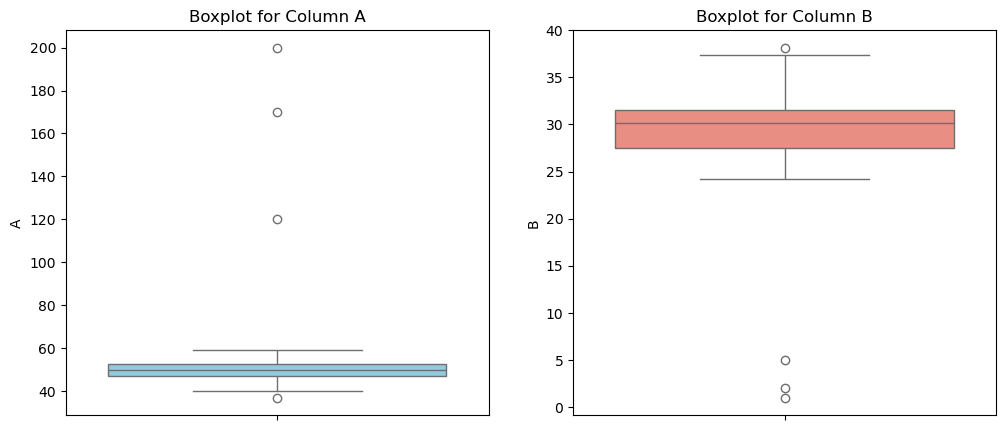

In [52]:
# Setting up a side by side boxplots
plt.figure(figsize=(12,5))
# Boxplot for column A
plt.subplot(1,2,1)
sns.boxplot(data=df,y=df['A'],color='skyblue')
plt.title('Boxplot for Column A')

# Boxplot for column B
plt.subplot(1,2,2)
sns.boxplot(data=df,y=df['B'],color='salmon')
plt.title('Boxplot for Column B')
plt.show()

In [55]:
## keeping the non_outliers
df_cleaned=df[
df['A'].between(lb_A,ub_A) &
df['B'].between(lb_B,ub_B)
]

In [56]:
df_cleaned.shape

(99, 2)

In [57]:
print(f"Original dataset size: {df.shape[0]} rows")
print(f"Cleaned dataset size: {df_cleaned.shape[0]} rows")

Original dataset size: 103 rows
Cleaned dataset size: 99 rows
